# Stroke Prediction

#### Student names : Mehmet Sezer,Burak Yılmaz



## Table of Content

[Problem](#Problem)   
[Data Understanding](#data_understanding)  
[Data Visualization](#data_visualization)   
[Data Preparation](#data_preparation)  
[Modeling](#Modeling)  
[Evaluation](#Evaluation)  
[References](#References)   


## Problem <a class="anchor" id="purpose"></a>

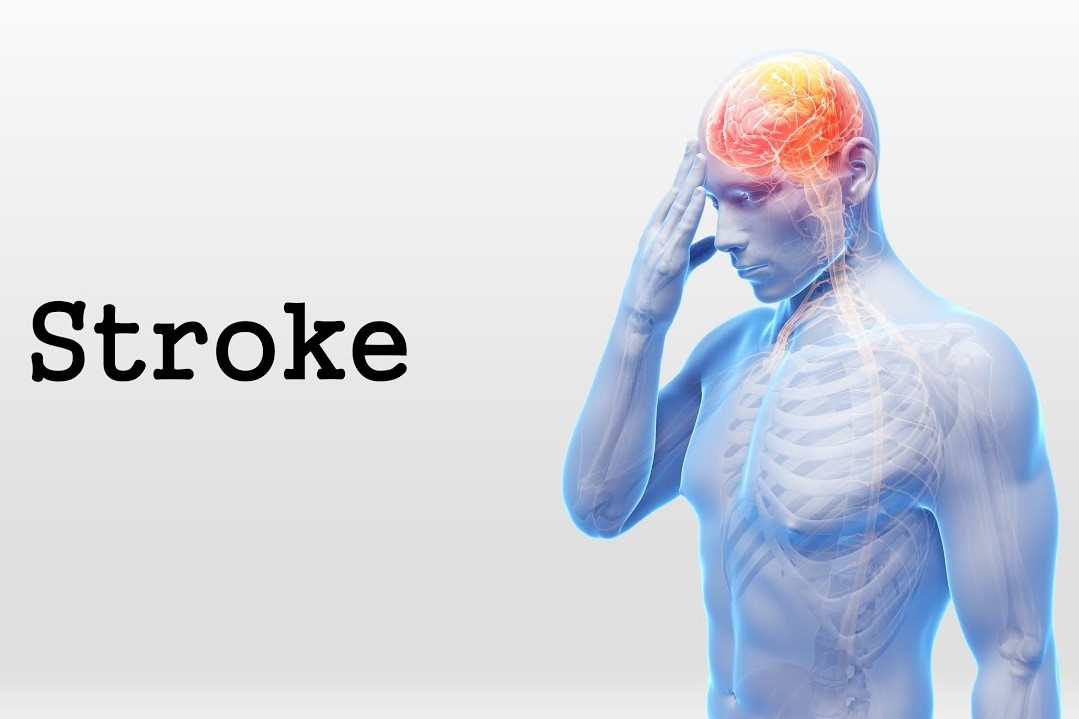
First let's start with what is stroke? 

A stroke is a medical condition in which poor blood flow to the brain causes cell death. There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both cause parts of the brain to stop functioning properly. Signs and symptoms of a stroke may include an inability to move or feel on one side of the body, problems understanding or speaking, dizziness, or loss of vision to one side. Signs and symptoms often appear soon after the stroke has occurred. If symptoms last less than one or two hours, the stroke is a transient ischemic attack (TIA), also called a mini-stroke. A hemorrhagic stroke may also be associated with a severe headache. The symptoms of a stroke can be permanent. Long-term complications may include pneumonia and loss of bladder control.

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient.

## Data Understanding<a class="anchor" id="data_understanding"></a>

Importing the libraries.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import plotly.graph_objs as go
import pylab as pl
from plotly.subplots import make_subplots
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold,train_test_split,GridSearchCV
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,plot_roc_curve,roc_auc_score,roc_curve, auc
from imblearn.over_sampling import SMOTE

**Dataset Information**

The csv contains data related to patients who may have heart disease and various attributes which determine that :

**id**: unique identifier

**gender**: "Male", "Female" or "Other"

**age**: age of the patient

**hypertension**: 0 if the patient doesn't have hypertension, 1 if the 
patient has hypertension

**heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

**ever_married**: "No" or "Yes"

**work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

**Residence_type**: "Rural" or "Urban"

**avg_glucose_level**: average glucose level in blood

**bmi**: body mass index

**smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*

**stroke**: 1 if the patient had a stroke or 0 if not 

**Note: "Unknown" in smoking_status means that the information is unavailable for this patient**

In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


Dropping id column because its irrelevant in machine learning model.

In [ ]:
df = df.drop('id', axis=1)

Descriptive statistics information. Since our data is consists of mixed data types the default is to return only an analysis of numeric columns.

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Dataset consists of 5110 rows which of each reprsents different patient and 11 columns which are different features.

In [ ]:
print("Total Rows            :", df.shape[0])
print("Total Columns         :", df.shape[1])
print("Column names          : ",end="")
for col in df.columns:
    print(col,end="\n\t\t        ")


Total Rows            : 5110
Total Columns         : 11
Column names          : gender
		        age
		        hypertension
		        heart_disease
		        ever_married
		        work_type
		        Residence_type
		        avg_glucose_level
		        bmi
		        smoking_status
		        stroke
		        

Let's look at if our dataset contains any null value for some columns .Bmi column has 201 null value which we will deal later.

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Data Visualization<a class="anchor" id="data_visualization"></a>

First we will examine numerical features of our dataset and then we will continue with categorial features.

By looking the below graphs we can say : 

**Age** distribution is normal distribution. 

**Bmi** field may have outliers and most of the values gathered between 15-55. The outliers make the distribution curve highly skewed towards right. 

**Avg glucose level** distribution looks like semi normal distribution and most of the data are below 150 moreover like bmi field it has outliers.

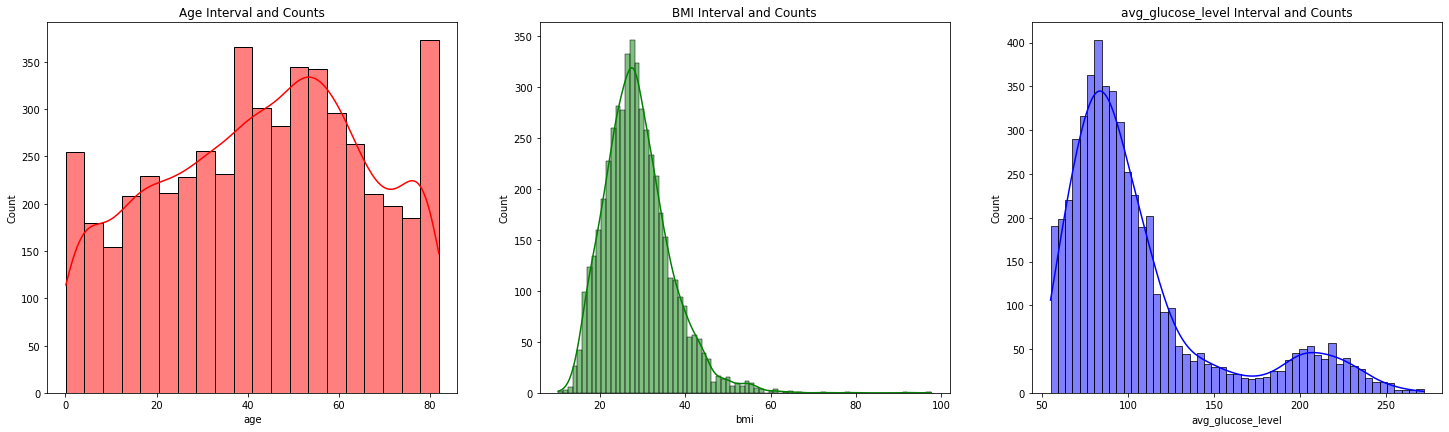

In [ ]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(df['age'], color = 'red', kde = True).set_title('Age Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(df['bmi'], color = 'green', kde = True).set_title('BMI Interval and Counts')

plt.subplot(2,3,3)
sns.histplot(df['avg_glucose_level'], kde = True, color = 'blue').set_title('avg_glucose_level Interval and Counts');

Below we examine categorical features and we try to understand if they affecting stroke positive cases.

Patients in our dataset mostly have no hypertension. Since the proporiton of people with hypertension is significantly higher than the proportion of people with no hypertension we can say stroke is highly correlated with hypertension.

In [ ]:
value=df.hypertension.value_counts()
y1=df.query('stroke==0')['hypertension'].value_counts()
y2=df.query('stroke==1')['hypertension'].value_counts()
x=["no", "yes"]

fig = make_subplots(rows=1, cols=2, subplot_titles=("Hypertension",'Hypertension vs stroke'),specs=[[{'type':'domain'}, {"type": "bar"}]])
fig.add_trace(go.Pie(labels=x,values=value , name="Hypertension",hole=0.4,pull=[0.02,0.02,0.02,0.02],
                     textinfo="label+percent"),
              1, 1)
fig.add_trace(go.Bar(name='Stroke negative', x=x, y=y1),1, 2)
fig.add_trace(go.Bar(name='Stroke positive', x=x, y=y2),1, 2)
fig.update_layout(height=440, width=1000)
fig.show()

Patients in our dataset mostly have no heart disease. Since the proporiton of people with heart disease is significantly higher than the proportion of people with no heart disease we can say stroke is highly correlated with heart disease.

In [ ]:
value=df.heart_disease.value_counts()
y1=df.query('stroke==0')['heart_disease'].value_counts()
y2=df.query('stroke==1')['heart_disease'].value_counts()
x=["no", "yes"]

fig = make_subplots(rows=1, cols=2, subplot_titles=("Heart_Disease",'Heart_Disease vs stroke'),specs=[[{'type':'domain'}, {"type": "bar"}]])
fig.add_trace(go.Pie(labels=x,values=value , name="Heart_Disease",hole=0.4,pull=[0.02,0.02,0.02,0.02],
                     textinfo="label+percent"),
              1, 1)
fig.add_trace(go.Bar(name='Stroke negative', x=x, y=y1),1, 2)
fig.add_trace(go.Bar(name='Stroke positive', x=x, y=y2),1, 2)
fig.update_layout(height=520, width=1000)
fig.show()

The graph below shows us stroke positive does not correlate with smokers, since the proportion of people with stroke is about the same among other smoking status.

In [ ]:
value=df.smoking_status.value_counts()
y1=df.query('stroke==0')['smoking_status'].value_counts()
y2=df.query('stroke==1')['smoking_status'].value_counts()
x=["never smoked", "unknown","formerly smoked","smokes"]

fig = make_subplots(rows=1, cols=2, subplot_titles=("Smoking Status",'smoking status vs stroke'),specs=[[{'type':'domain'}, {"type": "bar"}]])
fig.add_trace(go.Pie(labels=x,values=value , name="Smoking Status",hole=0.4,pull=[0.02,0.02,0.02,0.02],
                     textinfo="label+percent"),
              1, 1)
fig.add_trace(go.Bar(name='Stroke negative', x=x, y=y1),1, 2)
fig.add_trace(go.Bar(name='Stroke positive', x=x, y=y2),1, 2)
fig.update_layout(height=450, width=1000)
fig.show()

From the below graphs we can say that our almost half of the participants have private job. Since the proportion of people with stroke positive is about the same among other work types, probably work type is not an important feature for us.

In [ ]:
value=df.work_type.value_counts()
y1=df.query('stroke==0')['work_type'].value_counts()
y2=df.query('stroke==1')['work_type'].value_counts()
x=["Private","Self-Employed","Children","Govt_job","Never_worked"]

fig = make_subplots(rows=1, cols=2, subplot_titles=("Work Type",'work type vs stroke'),specs=[[{'type':'domain'}, {"type": "bar"}]])
fig.add_trace(go.Pie(textposition="auto",labels=x,values=value , name="Work Type",hole=0.4,pull=[0.02,0.02,0.02,0.02],
                     textinfo="label+percent"),
              1, 1)
fig.add_trace(go.Bar(name='Stroke negative', x=x, y=y1),1, 2)
fig.add_trace(go.Bar(name='Stroke positive', x=x, y=y2),1, 2)
fig.update_layout(height=440, width=1000)
fig.show()

Our data is mostly consists of people who is married. By observing the graphs below we may say, marriage status can have a little effect on stroke positive cases.

In [ ]:
value=df.ever_married.value_counts()
y1=df.query('stroke==0')['ever_married'].value_counts()
y2=df.query('stroke==1')['ever_married'].value_counts()
x=["married","no married"]

fig = make_subplots(rows=1, cols=2, subplot_titles=("Married Status",'married status vs stroke'),specs=[[{'type':'domain'}, {"type": "bar"}]])
fig.add_trace(go.Pie(labels=x,values=value , name="Married Status",hole=0.4,pull=[0.02,0.02,0.02,0.02],
                     textinfo="label+percent"),
              1, 1)
fig.add_trace(go.Bar(name='Stroke negative', x=x, y=y1),1, 2)
fig.add_trace(go.Bar(name='Stroke positive', x=x, y=y2),1, 2)
fig.update_layout(height=440, width=1000)
fig.show()

Since there is only one 'Other' category in gender, we should remove it from our data.

In [ ]:
value=df.gender.value_counts()
print(value);

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Removing "Other" category from gender column.

In [ ]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

From the below graphs we can say that gender type is almost equally distributed and since the proportion of stroke positive cases is about the same among males and females we can say it cause no effect on stroke directly.


In [ ]:
y1=df.query('stroke==0')['gender'].value_counts()
y2=df.query('stroke==1')['gender'].value_counts()
x=["female","male"]
fig = make_subplots(rows=1, cols=2, subplot_titles=("Gender",'gender vs stroke'),specs=[[{'type':'domain'}, {"type": "bar"}]])
fig.add_trace(go.Pie(labels=x,values=value , name="Gender",hole=0.4,pull=[0.02,0.02,0.02,0.02],
                     textinfo="label+percent"),
              1, 1)
fig.add_trace(go.Bar(name='Stroke negative', x=x, y=y1),1, 2)
fig.add_trace(go.Bar(name='Stroke positive', x=x, y=y2),1, 2)
fig.update_layout(height=400, width=1000)
fig.show()

It seems like the Residence Type is uniformly distributed and probably, it is not affecting stroke positive cases.

In [ ]:
value=df.Residence_type.value_counts()
y1=df.query('stroke==0')['Residence_type'].value_counts()
y2=df.query('stroke==1')['Residence_type'].value_counts()
x=["Urban","Rural"]
fig = make_subplots(rows=1, cols=2,specs=[[{'type':'domain'}, {"type": "bar"}]],subplot_titles=("Residence type",'Residence type vs stroke'))
fig.add_trace(go.Pie(labels=x, values=value, name="Residence_type",hole=0.4,pull=[0.02,0.02,0.02,0.02],
                     textinfo="label+percent"),
              1, 1)
fig.add_trace(go.Bar(name='Stroke negative', x=x, y=y1),1, 2)
fig.add_trace(go.Bar(name='Stroke positive', x=x, y=y2),1, 2)
fig.update_layout(height=440, width=1000)


fig.show()

Seems like our data is unbalanced because mostly we have stroke negative cases. We will do our best to deal with this data.

In [ ]:
value=df.stroke.value_counts()
y1=df.query('stroke==0')['stroke'].value_counts()
y2=df.query('stroke==1')['stroke'].value_counts()
x=["stroke"]
label = ["stroke negative", "stroke positive"]
fig = make_subplots(rows=1, cols=2,specs=[[{'type':'domain'}, {"type": "bar"}]],subplot_titles=("Stroke distribution",'Stroke negative vs Stroke positive'))
fig.add_trace(go.Pie(textposition="inside",labels=label,values=value , name="Stroke",hole=0.4,pull=[0.02,0.02,0.02,0.02],
                     textinfo="label+percent"),1, 1)
fig.add_trace(go.Bar(name="stroke negative", x=x, y=y1),1, 2)
fig.add_trace(go.Bar(name='stroke positive', x=x, y=y2),1, 2)
fig.update_layout(height=440, width=1000)


fig.show()


### *Intial Observations about the dataset*

*   Data from bmi feature has some missing values.
*   Both Categorical and numerical features are present.
*   Most of the data is categorical.
*   Data for patients who have a stroke are much lesser than those who have not a stroke. This imbalance would cause our model to make a wrongful prediction, therefore we will balance our data before data modeling.
*   We see that the patients working for private sectors have more likely to suffer from stroke than the rest of the working class.
*   The majority of our patients below to a private working class and are between the ages of 36-54.
*   A very less portion of our patients has never worked. Also, a very less portion of our patients are senior citizens.
*   It is observed that patients who formerly smoked are little higher than those who currently continue smoking.
*   A major portion of the patients are women.
*   There is a very minor difference in the proportion of patients living in urban/rural areas. Whereas a majority of patients have been married.
*   We observe that there are many outliers in the body mass index and the average glucose level, which needs to be handled before data modeling.
*   Hypertension and heart disease features are correlated to stroke as we could expect.
*   Surprisingly, it seems that the stroke is not highly corralated to smokers since the proportion of person having a stroke is fairly the same among the different smoking status.











## Data Preparation<a class="anchor" id="data_preparation"></a>

Feature types of our dataset before conversion.

In [ ]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

From the correlation heatmap below, we cannot see any strong correlation between any two feature. In conclusion, based on the correlation map we cannot eliminate any feature.

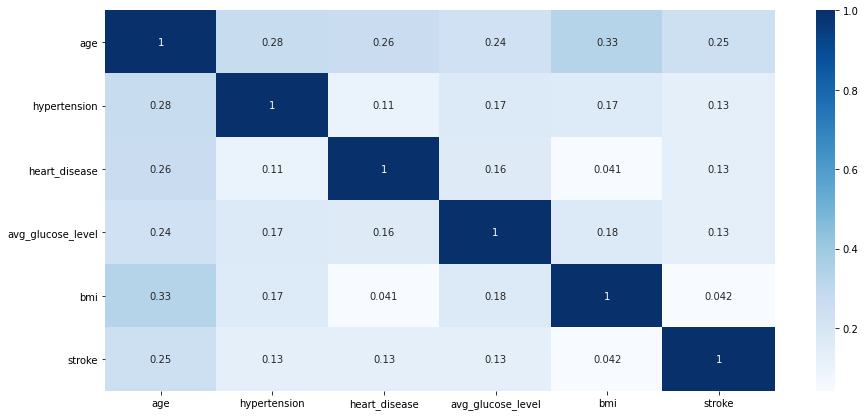

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

Mapping features with only two options to 0 and 1.

In [ ]:
df = df.replace({'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0 ,'Urban': 1, 'Rural': 0})

Machine learning algorithms cannot process categorical variables and can give poor results. In this case, we need to turn our column of labels into separate columns of 0s and 1s. Below we turn our categorical columns (column of labels) into indicator columns (columns of 0s and 1s). For that purpose we use get_dummies function.

In [ ]:
object_col = [col for col in df.columns if df[col].dtype == 'object']

In [ ]:
df = pd.get_dummies(data=df, columns=object_col,drop_first=True)

Feature types of our dataset after conversion.

In [ ]:
df.dtypes

gender                              int64
age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
Residence_type                      int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
dtype: object

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
1,1,61.0,0,0,1,0,202.21,NaN,1,0,0,1,0,0,1,0
2,0,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
3,1,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
4,1,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0


Let's check if any feature of the dataset contains missing values. We will use knn inputer to fill that missing values if any.

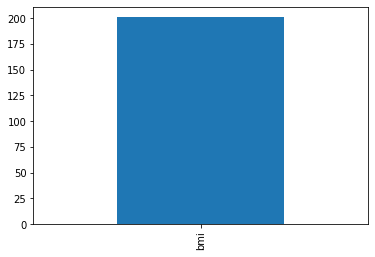

In [ ]:
df[df.columns[df.isnull().any()]].isnull().sum().plot.bar();

**KNN Imputer:** Imputation for completing missing values using k-Nearest Neighbors. Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

We used RandomForestClassifier in the pipeline because previous models which we trained, had more accurate with RandomForestClassifier.

By looking at the graph below we can find best n_neighbours parameter. We will use this value for knnImputer.

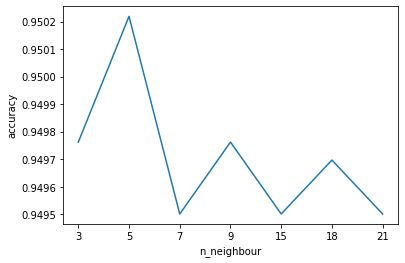

In [ ]:
results = list()
strategies = [str(i) for i in [3,5,7,9,15,18,21]]
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, df[df.columns.difference(['stroke'])], df['stroke'], scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
    results.append(np.mean(scores))
# plot model performance for comparison
plt.plot(strategies,results)
plt.xlabel("n_neighbour")
plt.ylabel("accuracy")
plt.show()

In [ ]:
imputer = KNNImputer(n_neighbors=int(strategies[results.index(max(results))]))
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

After filling the empty columns let's check if any field is still empty.

In [ ]:
df.isna().values.any()

False

We mentioned before that dataset bmi and avg_glucose_level features have outliers. Having outliers in the dataset guides the algorithm onto making wrong predictions, that seem just right to the predictive model. Therefore we have eliminated the outliers using a graphical method.

In [ ]:
print("The shape before removing the BMI outliers : ",df.shape)


The shape before removing the BMI outliers :  (5109, 16)


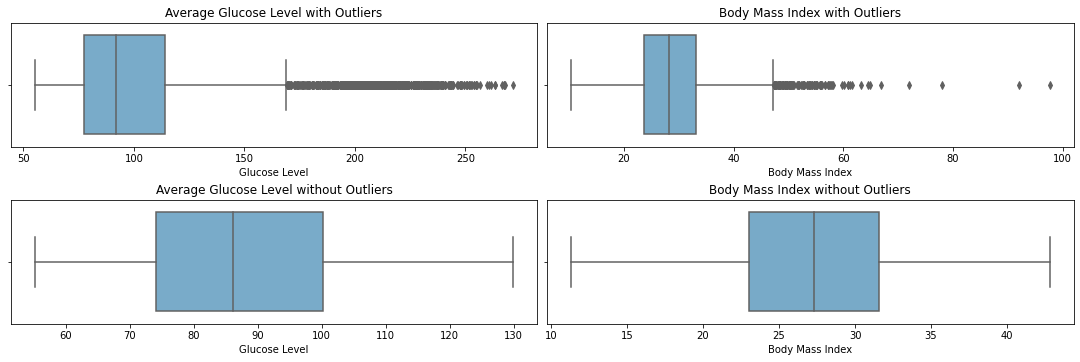

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(2,2,1)
plt.title("Average Glucose Level with Outliers")
sns.boxplot(x = df['avg_glucose_level'],palette = "Blues_r")
plt.xlabel("Glucose Level")

plt.subplot(2,2,2)
plt.title("Body Mass Index with Outliers")
sns.boxplot(x = df['bmi'],palette = "Blues")
plt.xlabel("Body Mass Index")

plt.subplot(2,2,3)
plt.title("Average Glucose Level without Outliers")
df = df[df['avg_glucose_level'] < 130] 
sns.boxplot(x = df['avg_glucose_level'],palette = "Blues_r")
plt.xlabel("Glucose Level")

plt.subplot(2,2,4)
plt.title("Body Mass Index without Outliers")
df = df[(df['bmi'] > 10.3) & (df['bmi'] < 43)]
sns.boxplot(x = df['bmi'],palette = "Blues")
plt.xlabel("Body Mass Index")

plt.tight_layout(pad=0.6)

In [ ]:
print("The shape after removing the BMI outliers : ",df.shape)

The shape after removing the BMI outliers :  (4022, 16)


The outliers of bmi and avg_glucose_level index have been removed. Let's plot the distribution to see if they are still skewed.

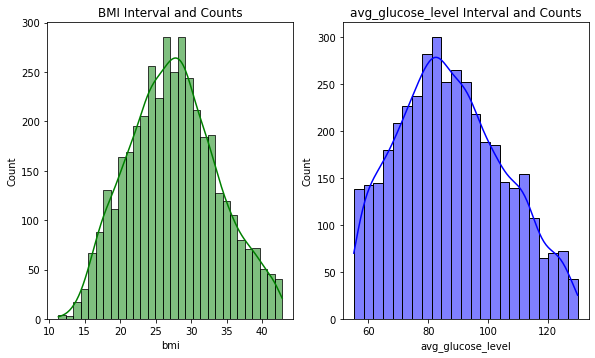

In [ ]:
plt.figure(figsize=(15,12))

plt.subplot(2,3,1)
sns.histplot(df['bmi'], color = 'green', kde = True).set_title('BMI Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(df['avg_glucose_level'], kde = True, color = 'blue').set_title('avg_glucose_level Interval and Counts');

Before applying any classifier algorithm we should balance over dataset because imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance, specifically for the minority class.

Since our data is highly imbalanced, there are two ways to deal with it. We can either undersample the majority class or we could oversample the minority class.We will be using oversampling technique for this project.

The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or **SMOTE** for short.

Before applying smote technique to imbalanced dataset. We clearly see that stroke negative cases significantly higher than stroke positive cases.

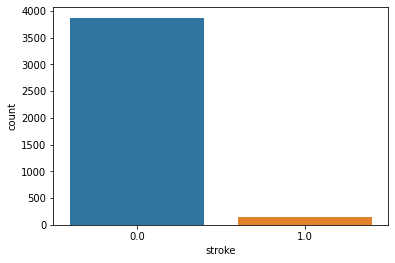

In [ ]:
sns.countplot(df["stroke"], x = 'stroke', y= None)
plt.show()

In [ ]:
sm = SMOTE(random_state=777, ratio = 1)
X, Y = sm.fit_sample(df[df.columns.difference(['stroke'])], df['stroke'])

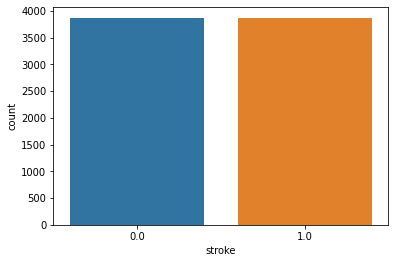

In [ ]:
y = pd.DataFrame({'stroke':Y})
sns.countplot(data = y, x = 'stroke', y= None)
plt.show()

After applying smote technique we can see that dataset iş balanced.


## Modeling<a class="anchor" id="classificationmodel"></a>

A **pipeline** is a series of steps in which data is transformed.
Pipelines allows us to encapsulate all the preprocessing steps, feature selections, scaling, the encoding of features, and most importantly it helps us prevent data leakage.

Below we used cross validation and pipeline technique to find the best accurate classification algorithm.

In [ ]:
DT_PIPE = Pipeline(steps = [('scale',MinMaxScaler()),('DT',DecisionTreeClassifier(random_state=42))])
RF_PIPE = Pipeline(steps = [('scale',MinMaxScaler()),('DT',RandomForestClassifier(random_state=42))])
SVM_PIPE = Pipeline(steps = [('scale',MinMaxScaler()),('DT',SVC(random_state=42))])
LR_PIPE = Pipeline(steps = [('scale',MinMaxScaler()),('DT',LogisticRegression(random_state=42))])

In [ ]:
DT_CROSS_VAL = cross_val_score(DT_PIPE,X,Y,cv=10)
RF_CROSS_VAL = cross_val_score(RF_PIPE,X,Y,cv=10)
SVM_CROSS_VAL = cross_val_score(SVM_PIPE,X,Y,cv=10)
LR_CROSS_VAL = cross_val_score(LR_PIPE,X,Y,cv=10)

In [ ]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,subplot_titles=('Decision Tree Cross Val Scores',
                                                                     'RandomForest Cross Val Scores',
                                                                    'SVM Cross Val Scores','Logistic Regression Cross Val Scores'))

fig.add_trace(
    go.Scatter(x=list(range(0,len(DT_CROSS_VAL))),y=DT_CROSS_VAL,name='Decision Tree'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(DT_CROSS_VAL))),y=RF_CROSS_VAL,name='RandomForest'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(DT_CROSS_VAL))),y=SVM_CROSS_VAL,name='SVM'),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(DT_CROSS_VAL))),y=LR_CROSS_VAL,name='Logistic Regression'),
    row=4, col=1
)

fig.update_layout(height=700, width=900, title_text="Different Model 5 Fold Cross Validation")
fig.update_yaxes(title_text="Score")
fig.update_xaxes(title_text="Fold #")

fig.show()

We used Random Forest for classification because it is more stable and more accurate than other algorithms based on the cross validation scores that we observed above graphs. In that way we random forest classification gives more accurate and reliable model than the other classification models.

Split the dataset to %70 train-set and %30 test-set.

**random_state:** Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.

**stratify:** We used strafied train-test split so that split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size = 0.3,random_state=1,stratify=Y, shuffle=True)

**Min-Max Normalization**: Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

We use **Min-Max Normalization** technique before evaluating the machine learning model.

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Evaluate **cross_val_score** to prevent overfitting. We get good average accuracy, so we can say that our train and test splitting distribution is good.

**cv**: Determines the cross-validation splitting strategy. We used 5 so it means it will use (Stratified)KFold with 5 folds.

In [ ]:
cv = RandomForestClassifier()
accuracies = cross_val_score(estimator = cv, X = x_train, y= y_train, cv = 5)
print("average accuracy: ",np.mean(accuracies))
print("average std: ",np.std(accuracies))

average accuracy:  0.9782374547247776
average std:  0.004967847330370606


Random forest parameters which we used.

**n_estimators**: The number of trees in the forest.

**max_features**: The number of features to consider when looking for the best split.

**max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**GridSearchCV**: Exhaustive search over specified parameter values for an estimator.

In [ ]:
# Number of trees in random forest
n_estimators = [100, 200, 300, 500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [None, 10, 80, 90, 100, 110]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, random_grid, cv = 5)
rf_cv.fit(x_train, y_train)

print("Hyperparameter: ",rf_cv.best_params_)
print("Best accuracy:  ",rf_cv.best_score_)

Hyperparameter:  {'max_depth': 100, 'max_features': 'auto', 'n_estimators': 300}
Best accuracy:   0.9795293077354736


Let's fit the model with best parameters we found by using GridSearchCV.

In [ ]:
rf = RandomForestClassifier(
    n_estimators=rf_cv.best_params_["n_estimators"],
    max_depth=rf_cv.best_params_["max_depth"],
    max_features=rf_cv.best_params_["max_features"]
)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Evaluation<a class="anchor" id="evaluation"></a>

In statistics, the coefficient of determination, denoted R^2, is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

R^2 score of model

In [ ]:
rf.score(x_test,y_test)

0.9763339070567987

When we look our model's r^2 score we can say that our model has good accurace. Because it is very close to 1.

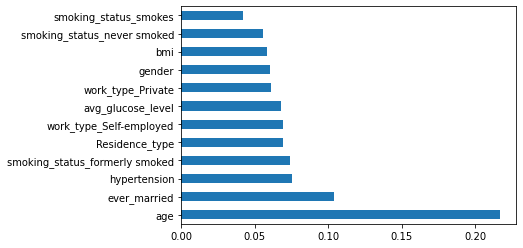

In [ ]:
importances = pd.Series(rf.feature_importances_, index=df[df.columns.difference(['stroke'])].columns)
importances.nlargest(12).plot(kind='barh');

By looking graph above, we can say that **age** feature has significantly more effect than the other features for having stroke or not.

### Confusion matrix for model

**confusion_matrix**: Compute confusion matrix to evaluate the accuracy of a classification. Rows are predicted values columns are actual values so that we can interpret our model using these informations.

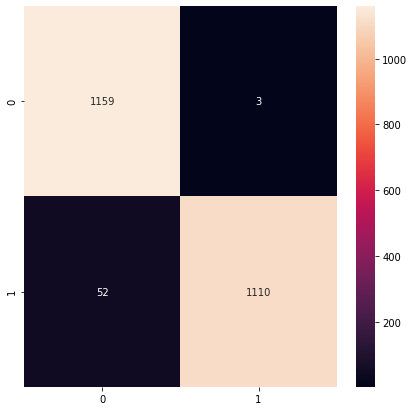

In [ ]:
x_pred_test = rf.predict(x_test)
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, x_pred_test), index = [i for i in ['0','1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (7,7))
sns.heatmap(confusion_matrix_df, annot=True, fmt="d");

By looking our model's confusion matrix, we can say that our model's prediction for not having stroke better than having stroke. Our model predict 3 not having stroke as having stroke and 52 having stroke as not having stroke.

### Classification report for model

**classification_report:** The classification report visualizer displays the precision, recall, F1, and support scores for the model.

**True Positives (TP):** These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.

**True Negatives (TN):** These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.

**False Positives (FP):** When actual class is no and predicted class is yes.

**False Negatives (FN):** When actual class is yes but predicted class in no.

The **recall** means "What percent of our predictions were correct" Recall is the ability of a classifier to find all positive instances Recall = TP/(TP+FN)

The **precision** will be "What percent of the positive cases did we catch". Precision is the ability of a classifier not to label an instance positive that is actually negative Precision = TP/(TP + FP)

The **f1-score** means "What percent of our positive predictions were correct". The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0 F1 Score = 2*(Recall * Precision) / (Recall + Precision)

The **support** is the number of occurence of the given class in your dataset.

The **macro-average** precision and recall score is calculated as arithmetic mean of individual classes’ precision and recall scores.

The **macro-average F1-score** is calculated as arithmetic mean of individual classes’ F1-score.


In [ ]:
print(classification_report(y_test, x_pred_test, target_names=["Stroke Negative", "Stroke Positive"]))

                 precision    recall  f1-score   support

Stroke Negative       0.96      1.00      0.98      1162
Stroke Positive       1.00      0.96      0.98      1162

       accuracy                           0.98      2324
      macro avg       0.98      0.98      0.98      2324
   weighted avg       0.98      0.98      0.98      2324



By looking our classification report, we can say that our model's precision,recall and f1-score very similar between having stroke or not.

### ROC Curve

**AUC-ROC** curve is the model selection metric for bi–multi class classification problem. ROC is a probability curve for different classes. ROC tells us how good the model is for distinguishing the given classes, in terms of the predicted probability.

A typical ROC curve has False Positive Rate (FPR) on the X-axis and True Positive Rate (TPR) on the Y-axis.

The higher the AUC(Area under curve), the better the performance of the model at distinguishing between the positive and negative classes.

When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.

As we can see from below graph , we have a clear distinction between the two classes as a result, we have the AUC of 1. The maximum area between ROC curve and base line is achieved here.



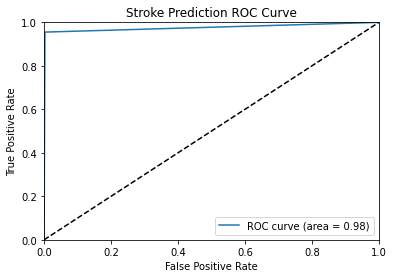

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, x_pred_test)
roc_auc = auc(fpr, tpr)
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Stroke Prediction ROC Curve')
pl.legend(loc="lower right")
pl.show()

The AUC for the ROC can be calculated using the roc_auc_score() function as well. The AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier. Our result shows us, our classifer almost excellent.

In [ ]:
roc_auc_score(y_test, x_pred_test)

## References<a class="anchor" id="references"></a>

[1] https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

[2] https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/

[3] https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

[4] https://medium.com/@venkatasujit272/overview-of-cross-validation-3785d5414ece

[5] https://scikit-learn.org/0.17/modules/generated/sklearn.metrics.r2_score.html

[6] https://vitalflux.com/micro-average-macro-average-scoring-metrics-multi-class-classification-python/

[7] https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397

[8] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

[9] https://towardsdatascience.com/clustering-why-to-use-it-16d8e2fbafe#:~:text=Inertia%20is%20the%20sum%20of,how%20dense%20the%20clusters%20are

[10] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

[11] https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

[12] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

[13] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

[14] https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

[15] https://www.kaggle.com/aditimulye/stroke-prediction-visualization-prediction

[16] https://www.kaggle.com/bariscal/stroke-entirely-ml-project-and-eda

[17] https://www.kaggle.com/ivangavrilove88/stroke-fe-smote-technique-17-models

[18] https://www.kaggle.com/jabeen12-stroke-prediction-data-visualization

[19] https://www.kaggle.com/ginelledsouza/stroke-analysis

[20] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

[21] https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

[22] https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

[23] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html



**Disclaimer!** <font color='grey'>This notebook was prepared by Mehmet Sezer, Burak Yılmaz as an assigment for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>